In [7]:
import m2aia as m2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from download_helper import DownloadMTBLS2639
file_names = DownloadMTBLS2639(selection=[2])

def showimg(image, cmap=None, title=None):
    sns.set_theme(style="ticks")
    fig = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
    ax = fig.add_subplot(111)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        labelleft=False,
        labelbottom=False)
    x = [10,60]
    y = [10,10]

    spacing = I.GetSpacing()
    ax.plot(x, y, color="white", linewidth=3)
    ax.text(x[0], y[0]+7, f"{int(spacing[0]*(x[1]-x[0])* 1000)} μm", color="white",size=14)
    if title:
        ax.text(x[0], y[0]-3, title, color="white", size=14)
    ax.imshow(image, interpolation='none', cmap=cmap)

    return fig, ax 

In [8]:
# Set the parameters
I = m2.ImzMLReader(str(file_names[0]))
#I.SetNormalization(m2.m2NormalizationTIC)
I.SetSmoothing(m2.m2SmoothingGaussian,12)
I.SetBaselineCorrection(m2.m2BaselineCorrectionTopHat)
I.Execute()

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

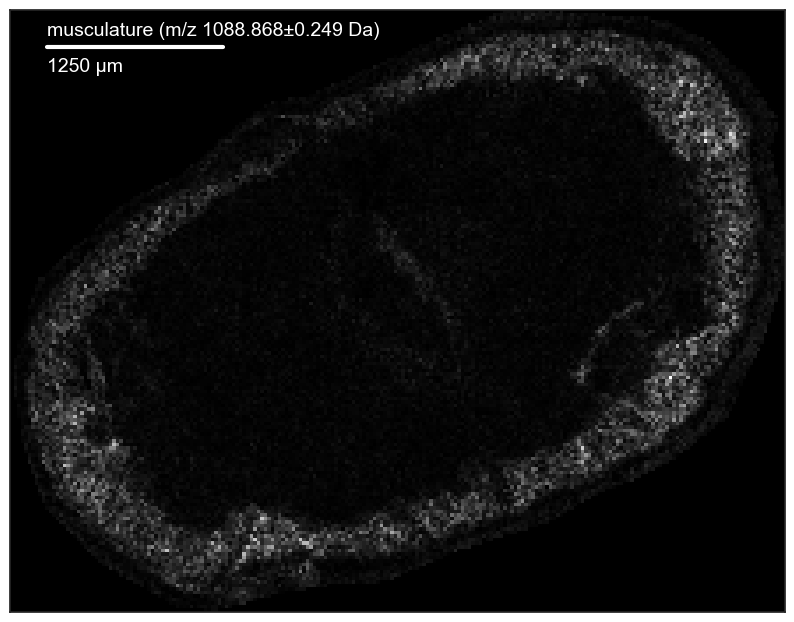

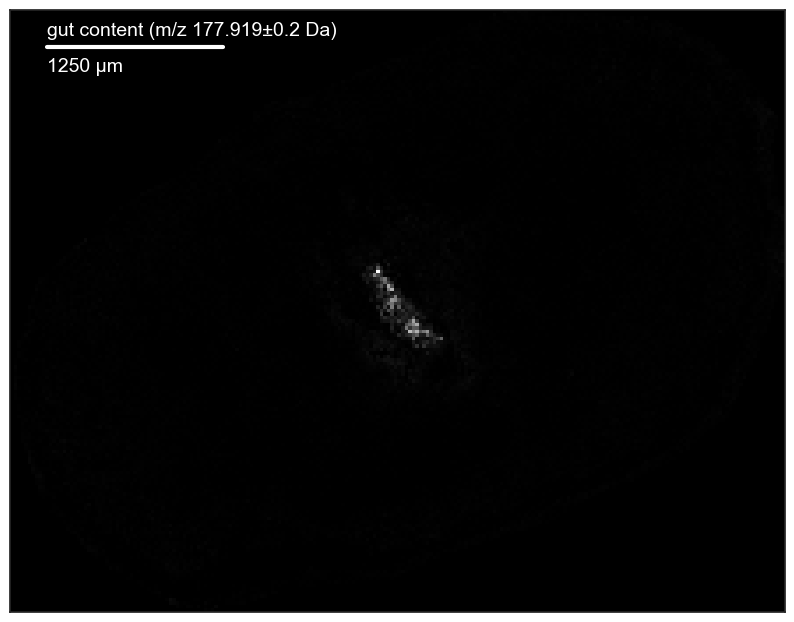

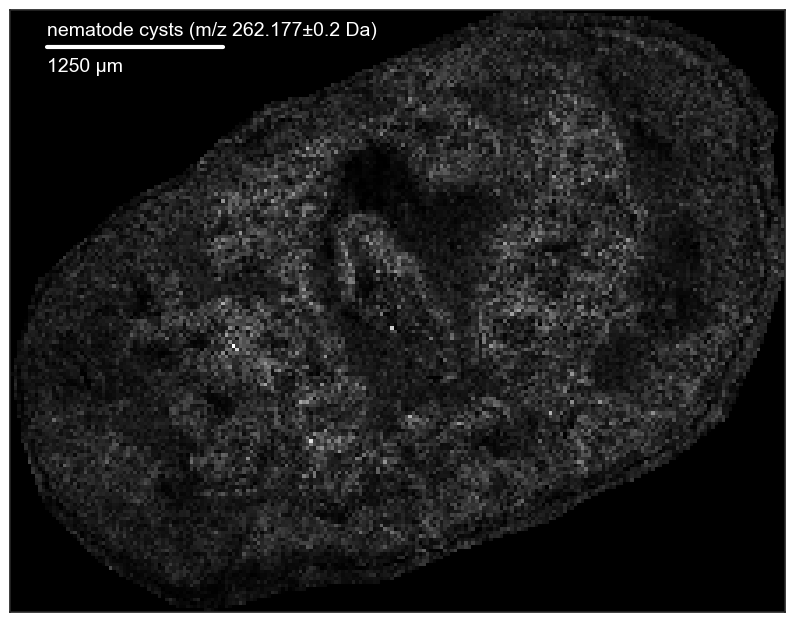

In [9]:
# 1) GetArray(mz, tol) will generate a numpy array, loosing all real world information like the origin, spacing or direction of the image.
# 2) GetImage(mz, tol) will generate a itkImage, that holds those real world information. 
#
# If ion images are produced for further analysis pipelines, it is recommended to use the GetImage method and save the images as .nrrd files [1], using SimpleITK [2].
# E.g.: sitk.WriteImage(I.GetImage(mz,tol), path/to/file.nrrd)
#
# [1] http://teem.sourceforge.net/nrrd/format.html<br/>
# [2] https://simpleitk.org/

# 
I.SetPooling(m2.m2PoolingMean)

MUSC = np.squeeze(I.GetArray(1088.868, 0.25))
CONT = np.squeeze(I.GetArray(177.919, 0.25))
NEMA = np.squeeze(I.GetArray(262.177, 0.25))


showimg(MUSC, cmap='gray', title='musculature (m/z 1088.868±0.249 Da)')
showimg(CONT, cmap='gray', title='gut content (m/z 177.919±0.2 Da)')
showimg(NEMA, cmap='gray', title='nematode cysts (m/z 262.177±0.2 Da)')

(171, 220)
Before (3, 171, 220) [Channels, Height, Width]
After (171, 220, 3) [Height, Width, Channels]


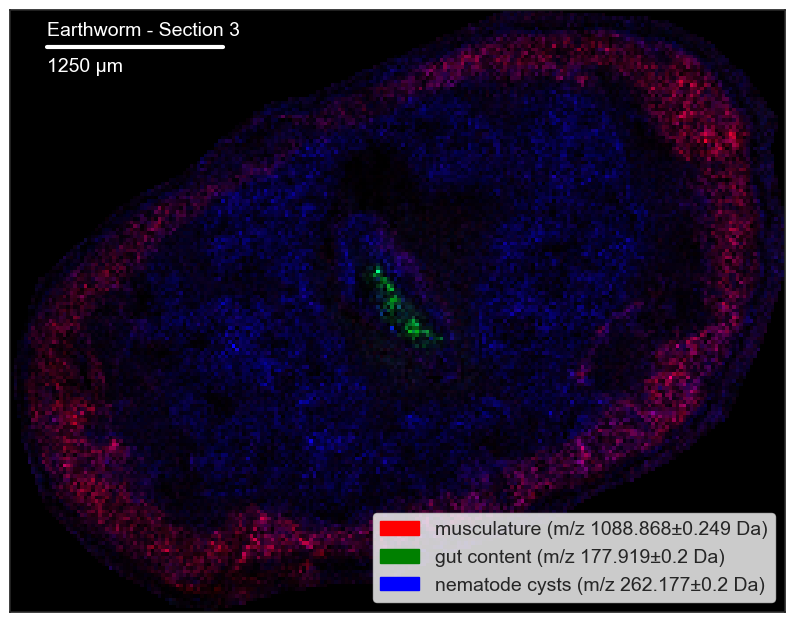

In [10]:
import matplotlib.patches as mpatches
# stack the images
print(MUSC.shape)

RGB = np.vstack([MUSC[np.newaxis],CONT[np.newaxis],NEMA[np.newaxis]])

print('Before', RGB.shape, '[Channels, Height, Width]')

# channelwise rescale intensities to values between 0 and 1
for i in range(3):
    RGB[i] = (RGB[i]-np.min(RGB[i]))/((np.max(RGB[i])-np.min(RGB[i]))) # map to interval [0,1]

# permute dimensions to get a valid image shape
RGB = np.moveaxis(RGB, [0],[2])

print('After', RGB.shape, '[Height, Width, Channels]')
fig, ax = showimg(RGB, title='Earthworm - Section 3')

red_patch = mpatches.Patch(color='red', label='musculature (m/z 1088.868±0.249 Da)')
ax.legend(handles=[red_patch])
green_patch = mpatches.Patch(color='green', label='gut content (m/z 177.919±0.2 Da)')
ax.legend(handles=[red_patch])
blue_patch = mpatches.Patch(color='blue', label='nematode cysts (m/z 262.177±0.2 Da)')
ax.legend(handles=[red_patch])

leg = ax.legend(handles = [red_patch, green_patch, blue_patch],loc='lower right', fontsize=14)